In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
#Load in the dataset 

institute_data = pd.read_csv("cleaned_institution_data.csv")
institute_data

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,18.0,17.0,17.0,NaN,0.173469,0.253155,0.331126,22489.0,0.182
1,University of Alabama at Birmingham,4,1,555.0,555.0,NaN,25.0,27.0,23.0,NaN,0.451035,0.513963,0.571058,24347.0,0.057
2,Amridge University,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160173,0.230769,0.332468,17680.0,0.110
3,University of Alabama in Huntsville,4,1,630.0,565.0,NaN,28.0,30.0,27.0,NaN,0.502003,0.548509,0.588311,23441.0,0.059
4,Alabama State University,4,1,480.0,465.0,NaN,18.0,17.0,17.0,NaN,0.136110,0.218587,0.289705,21476.0,0.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,Northeastern University Lifelong Learning Network,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.752574,0.786945,0.830500,NaN,0.020
1880,Arizona State University-Skysong,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535661,0.584856,0.626920,24636.0,0.062
1881,University of Florida-Online,3,1,635.0,605.0,570.0,26.0,27.0,24.0,9.0,0.640055,0.688023,0.717674,17405.0,0.015
1882,Georgia Military College,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201250,0.255176,0.325070,12321.0,0.188


In [ ]:
#Dataset subset with ACT composite score 
ACTCOMP = institute_data[institute_data['ACTCMMID'].notnull()].drop(["SATVRMID", "SATMTMID", "SATWRMID", "ACTENMID", "ACTMTMID","ACTWRMID"], axis=1)
ACTCOMP.head()

,INSTNM,HIGHDEG,CONTROL,ACTCMMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,18.0,0.173469,0.253155,0.331126,22489.0,0.182
1,University of Alabama at Birmingham,4,1,25.0,0.451035,0.513963,0.571058,24347.0,0.057
3,University of Alabama in Huntsville,4,1,28.0,0.502003,0.548509,0.588311,23441.0,0.059
4,Alabama State University,4,1,18.0,0.136110,0.218587,0.289705,21476.0,0.203
5,The University of Alabama,4,1,27.0,0.546711,0.601944,0.635813,29424.0,0.051


In [ ]:
#Dataset subset with SAT scores (all SAT columns)
SATSCOR = institute_data[institute_data['SATVRMID'].notnull() & institute_data["SATMTMID"].notnull() & institute_data["SATWRMID"].notnull()].drop(["ACTCMMID", "ACTENMID", "ACTMTMID","ACTWRMID"], axis=1)
SATSCOR.head()

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,0.173469,0.253155,0.331126,22489.0,0.182
5,The University of Alabama,4,1,590.0,580.0,540.0,0.546711,0.601944,0.635813,29424.0,0.051
8,Auburn University,4,1,615.0,615.0,570.0,0.683124,0.723961,0.780623,31282.0,0.036
10,Faulkner University,4,2,530.0,575.0,470.0,0.243713,0.308162,0.397230,33944.0,0.125
16,University of West Alabama,4,1,480.0,460.0,475.0,0.315612,0.366730,0.427191,20692.0,0.078


Prediction of 1 Year Repayment Rate Using ACT Composite Scores

In [ ]:
#Random Forest Regressor Applied to First Dataset (Prediction of 1 Year Repayment Rate using ACT Composite Scores)

from sklearn.ensemble import RandomForestRegressor 
X = ACTCOMP[["HIGHDEG", "CONTROL", "ACTCMMID", "COSTT4_A"]]
y = ACTCOMP[["RPY_1YR_RT"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

model = RandomForestRegressor(n_estimators = 30, random_state = 0)
random_forest = model.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.08554861396023322
MSE: 0.011876140190465945
RMSE: 0.10897770501559456
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Prediction of 1 Year Repayment Rate Using SAT Median Scores for Each Section

In [ ]:
#Random Forest Regressor Applied to Second Dataset (Prediction of 1 Year Repayment Rate using SAT Median Scores for each section)

X = SATSCOR[["HIGHDEG", "CONTROL", "SATVRMID", "SATMTMID", "SATWRMID","COSTT4_A"]]
y = SATSCOR[["RPY_1YR_RT"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

model = RandomForestRegressor(n_estimators = 30)
random_forest = model.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
MAE: 0.07913135679302799
MSE: 0.01038654352840009
RMSE: 0.10191439313659327


Prediction of 3 Year Repayment Rate Using SAT Median Scores for Each Section

In [ ]:
X = SATSCOR[["HIGHDEG", "CONTROL", "SATVRMID", "SATMTMID", "SATWRMID","COSTT4_A"]]
y = SATSCOR[["RPY_3YR_RT"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

model = RandomForestRegressor(n_estimators = 30)
random_forest = model.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07491599560834603
MSE: 0.011186493799263163
RMSE: 0.10576622239289424
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Prediction of 5 Year Repayment Rate Using SAT Median Scores for Each Section

In [ ]:
X = SATSCOR[["HIGHDEG", "CONTROL", "SATVRMID", "SATMTMID", "SATWRMID","COSTT4_A"]]
y = SATSCOR[["RPY_5YR_RT"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

model = RandomForestRegressor(n_estimators = 30)
random_forest = model.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print("MAE:" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
MAE: 0.06956643035513994
MSE: 0.008631299961011949
RMSE: 0.09290478976356359


In [ ]:
#Cross Validation to see if we can get a MAE lower than 7%

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X = SATSCOR[["HIGHDEG", "CONTROL", "SATVRMID", "SATMTMID", "SATWRMID","COSTT4_A"]]
y = SATSCOR[["RPY_5YR_RT"]]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(random_forest, X, y, scoring = 'neg_mean_absolute_error', cv=cv)
print("Accuracy: ", scores)

/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d a

Tried several other ML Algorithms including ElasticNetCV, Support Vector Regressor (SVR), AdaBoostRegressor with RandomizedSearchCV, and Gradient Boosting Regressor, but all of them performed worse than the random forest (error > 7%)

In [ ]:
#Visualizations for one decision tree from the random forest

estimator = random_forest.estimators_[0]

from sklearn import tree
text_representation = tree.export_text(estimator)
print(text_representation)

|--- feature_3 <= 577.50
|   |--- feature_3 <= 477.50
|   |   |--- feature_5 <= 24007.00
|   |   |   |--- feature_2 <= 477.50
|   |   |   |   |--- feature_5 <= 20732.00
|   |   |   |   |   |--- value: [0.29]
|   |   |   |   |--- feature_5 >  20732.00
|   |   |   |   |   |--- feature_4 <= 384.50
|   |   |   |   |   |   |--- value: [0.37]
|   |   |   |   |   |--- feature_4 >  384.50
|   |   |   |   |   |   |--- feature_3 <= 460.00
|   |   |   |   |   |   |   |--- value: [0.34]
|   |   |   |   |   |   |--- feature_3 >  460.00
|   |   |   |   |   |   |   |--- value: [0.33]
|   |   |   |--- feature_2 >  477.50
|   |   |   |   |--- feature_5 <= 16713.50
|   |   |   |   |   |--- value: [0.34]
|   |   |   |   |--- feature_5 >  16713.50
|   |   |   |   |   |--- feature_4 <= 451.00
|   |   |   |   |   |   |--- feature_3 <= 457.50
|   |   |   |   |   |   |   |--- value: [0.38]
|   |   |   |   |   |   |--- feature_3 >  457.50
|   |   |   |   |   |   |   |--- feature_2 <= 487.50
|   |   |   |   |  

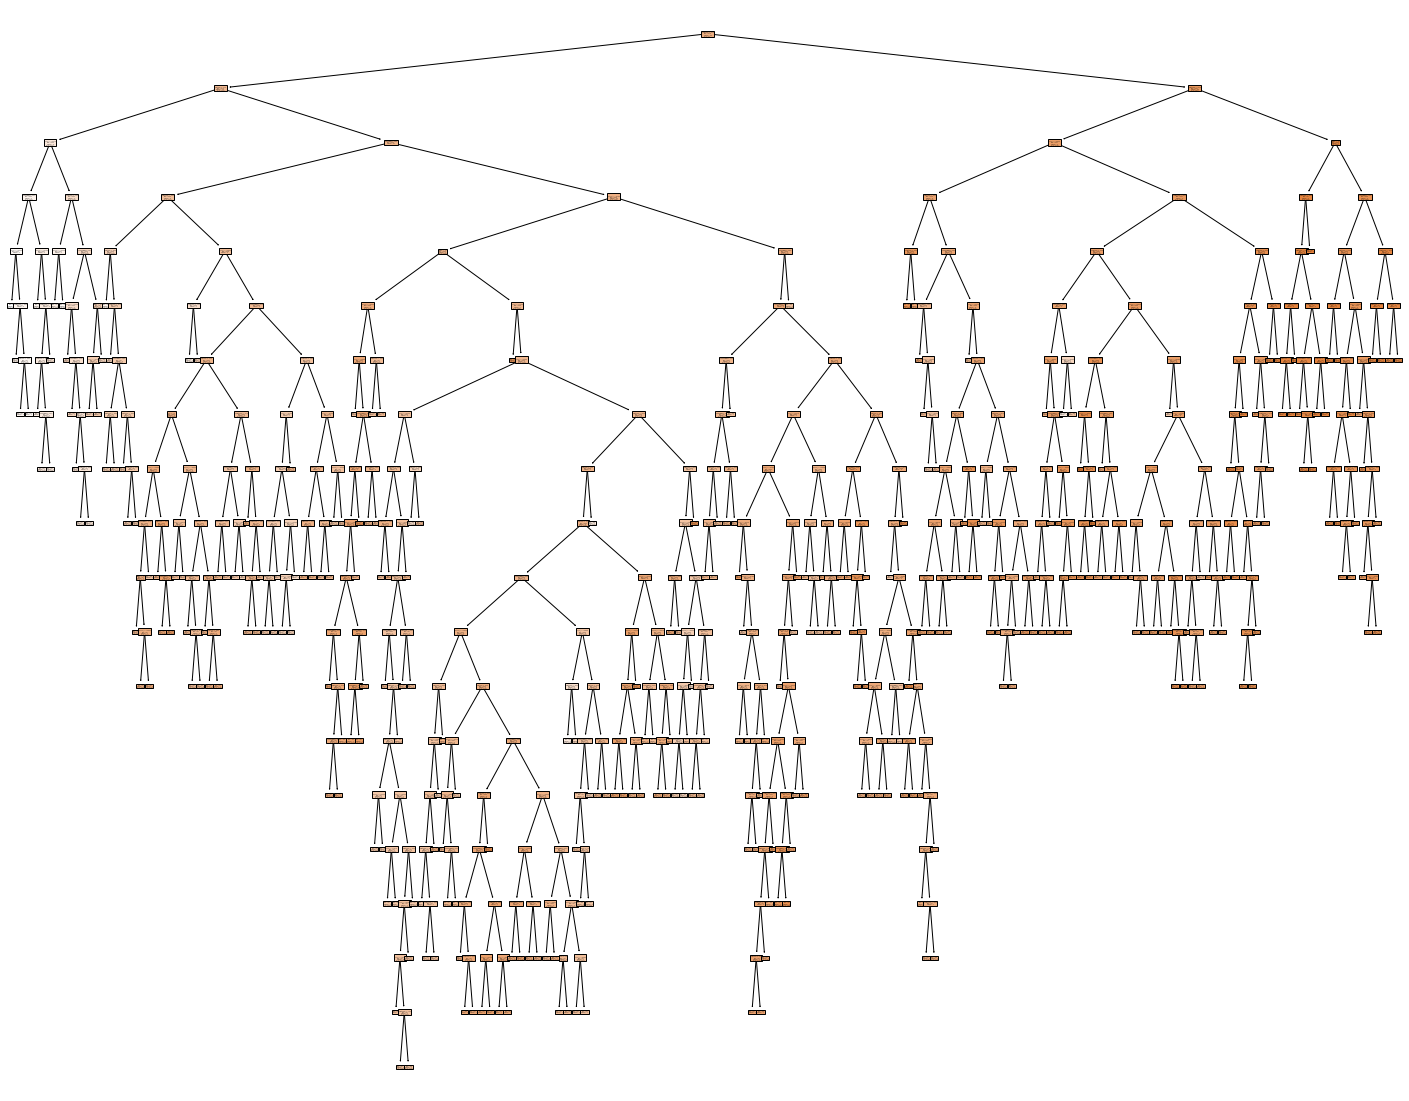

In [ ]:
fig = plt.figure(figsize=(25,20))
fn = ['HighDeg', 'Control','SATReadingMid', 'SATMathMid', 'SATWritingMid','COSTT4_A' ]
_ = tree.plot_tree(estimator, feature_names = fn, filled=True)
fig.savefig("decistion_tree2.svg")

In [ ]:
#Let's test the model using an arbitrary example to see how well it performs
test_pred = np.array([[4, 1, 475, 465, 414, 22489]])
test_df = pd.DataFrame(data = test_pred,  index = ["0"],  columns = ["HIGHDEG","CONTROL", "SATVRMID", "SATMTMID", "SATWRMID", "COSTT4_A"]) 
print(test_df)

y_pred = random_forest.predict(test_df)
print("Predicted 5-year repayment rate:", y_pred)

   HIGHDEG  CONTROL  SATVRMID  SATMTMID  SATWRMID  COSTT4_A
0        4        1       475       465       414     22489
Predicted 5-year repayment rate: [0.35034628]


In [ ]:
#Find the actual 5-year repayment rate for Alabama A&M University 
filtered_df = SATSCOR.loc[(SATSCOR['HIGHDEG'] == 4) & (SATSCOR['CONTROL'] == 1) & (SATSCOR['SATVRMID'] == 475) & (SATSCOR['SATMTMID'] == 465) & (SATSCOR['SATWRMID'] == 414) & (SATSCOR['COSTT4_A'] == 22489)]
filtered_df

,INSTNM,HIGHDEG,CONTROL,SATVRMID,SATMTMID,SATWRMID,RPY_1YR_RT,RPY_3YR_RT,RPY_5YR_RT,COSTT4_A,CDR3
0,Alabama A & M University,4,1,475.0,465.0,414.0,0.173469,0.253155,0.331126,22489.0,0.182


In [ ]:
print("Percent difference (%) between actual and predicted 5-year repayment rate:", y_pred.item() - filtered_df["RPY_5YR_RT"].item())

Percent difference (%) between actual and predicted 5-year repayment rate: 0.019220450759999896
